# Problem 4

In [130]:
import numpy as np #importing numpy for matrix operations
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [5]:
x = np.linspace(0,1,100)

In [6]:
y = np.cos(2*np.pi*x)

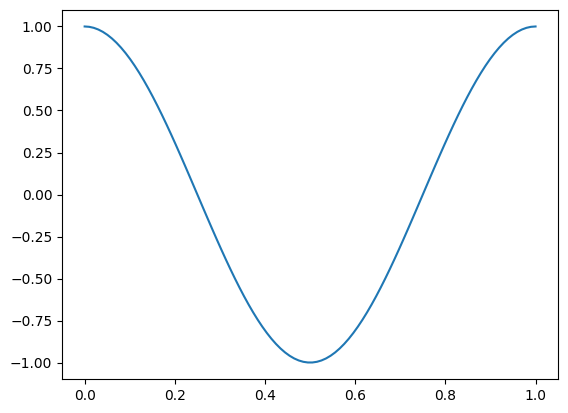

In [9]:
plt.plot(x,y)

In [12]:
z = y+np.random.normal(0,0.1,np.shape(y))

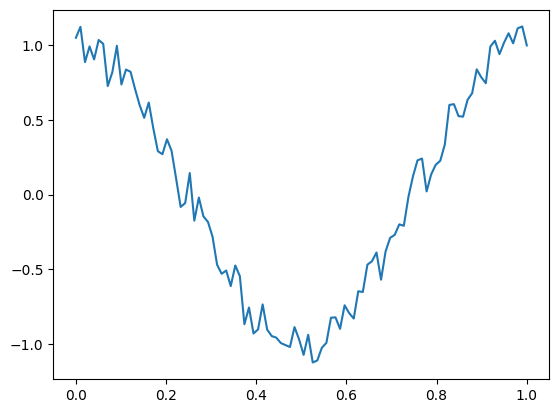

In [13]:
plt.plot(x,z)

[0.         0.14094888] -0.04212731888475714
[ 0.         -9.20587276  9.22917768] 1.5310370904255703
[ 0.         -9.59825071 10.19026189 -0.63013117] 1.564510029866776
[  0.           2.13281707 -41.65324408  79.1905162  -39.60317888] 0.9477178524172337
[  0.           3.43276663 -50.76357251 103.42204485 -66.73079756
  10.78764189] 0.9033631651892212
[ 0.00000000e+00 -6.58922000e-02 -1.47430826e+01 -4.22173341e+01
  2.07026170e+02 -2.29709940e+02  7.98463436e+01] 0.9817346986290235
[   0.           -1.3341319     3.08305864 -142.62312494  484.21192888
 -628.62516364  367.1219309   -81.73419445] 1.0011681229268945
[ 0.00000000e+00  1.62972204e+00 -5.18443885e+01  2.69797559e+02
 -1.07963534e+03  2.64030457e+03 -3.45216789e+03  2.25494231e+03
 -5.82923016e+02] 0.9694911359814632
[ 0.00000000e+00 -5.25143815e+00  1.12224137e+02 -1.31550308e+03
  6.78765988e+03 -1.95991983e+04  3.37951442e+04 -3.43067616e+04
  1.88441730e+04 -4.31248552e+03] 1.0208981985921135
[ 0.00000000e+00 -7.604978

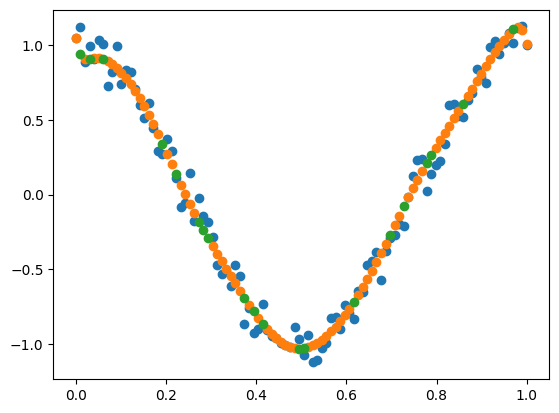

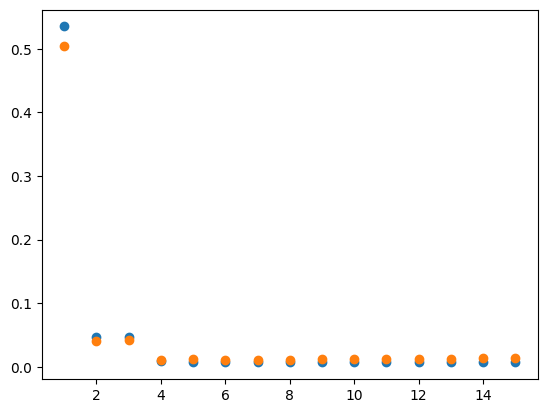

In [149]:
plt.scatter(x,z)
test_scores = []
train_scores = []
#coef[1][25] = [];
x_train,x_test,z_train,z_test = train_test_split(x,z,test_size=0.2,shuffle=True)
for itr in range(15):
    mdl = PolynomialFeatures(degree=itr+1)
    mdl.fit_transform(x_train.reshape(80,1))
    modelx = make_pipeline(mdl,LinearRegression())
    modelx.fit(x_train.reshape(80,1),z_train)
    mdl_out1 = modelx.predict(x_train.reshape(80,1))
    train_scores.append(mean_squared_error(z_train,mdl_out1))
    print(modelx.steps[1][1].coef_,modelx.steps[1][1].intercept_)
    mdl_out2 = modelx.predict(x_test.reshape(20,1))
    test_scores.append(mean_squared_error(z_test,mdl_out2))
plt.scatter(x_train,mdl_out1)
plt.scatter(x_test,mdl_out2)
plt.figure()
plt.scatter(np.linspace(1,len(train_scores),len(train_scores)),train_scores)
plt.scatter(np.linspace(1,len(test_scores),len(test_scores)),test_scores)

[ 0.         -0.10067536] 0.041016217206107916
[ 0.         -8.91388684  8.90728888] 1.493972651406258
[ 0.         -6.97416451  4.0548492   3.23518475] 1.33205032909321
[ 0.         -6.98291161  4.07554015  3.22190375 -0.        ] 1.3328511999282144
[ 0.         -6.61778184  0.83311983  8.40172104  0.         -2.48912266] 1.352521964149889
[ 0.         -6.58719236  0.          9.26125955  0.         -0.
 -2.70759193] 1.373468987828345
[ 0.         -6.58372586  0.          8.89218301  0.04836046  0.
 -0.         -2.47914776] 1.378372917683136
[ 0.         -6.39690342  0.          7.37047161  1.50724969  0.
  0.         -0.         -2.672004  ] 1.3617373450001957
[ 0.         -6.27212138  0.          6.69682242  1.90865451  0.
  0.         -0.         -0.         -2.56845902] 1.3481979895233567
[ 0.         -6.19921355  0.          6.49538773  1.82984721  0.
  0.         -0.         -0.         -0.         -2.39092422] 1.338884361880481
[ 0.         -6.16032807  0.          6.53312738  

C:\Users\osave\PycharmProjects\MAE551\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.992e-03, tolerance: 4.201e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\osave\PycharmProjects\MAE551\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e-01, tolerance: 4.201e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\osave\PycharmProjects\MAE551\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

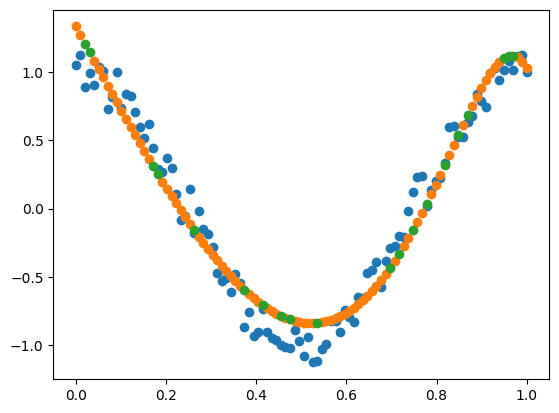

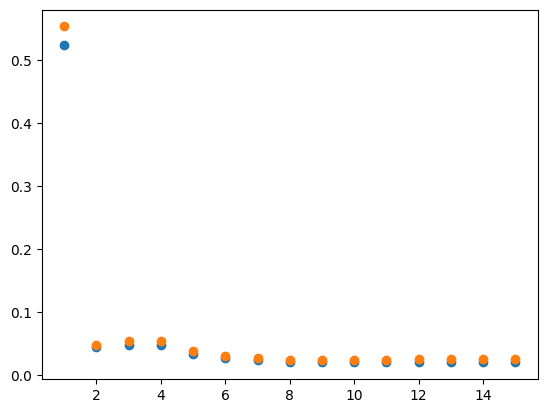

In [154]:
from sklearn.linear_model import Lasso
plt.scatter(x,z)
test_scores = []
train_scores = []
#coef[1][25] = [];
x_train,x_test,z_train,z_test = train_test_split(x,z,test_size=0.2,shuffle=True)
for itr in range(15):
    mdl = PolynomialFeatures(degree=itr+1)
    mdl.fit_transform(x_train.reshape(80,1))
    modelx = make_pipeline(mdl,Lasso(alpha=0.001))
    modelx.fit(x_train.reshape(80,1),z_train)
    mdl_out1 = modelx.predict(x_train.reshape(80,1))
    train_scores.append(mean_squared_error(z_train,mdl_out1))
    print(modelx.steps[1][1].coef_,modelx.steps[1][1].intercept_)
    mdl_out2 = modelx.predict(x_test.reshape(20,1))
    test_scores.append(mean_squared_error(z_test,mdl_out2))
plt.scatter(x_train,mdl_out1)
plt.scatter(x_test,mdl_out2)
plt.figure()
plt.scatter(np.linspace(1,len(train_scores),len(train_scores)),train_scores)
plt.scatter(np.linspace(1,len(test_scores),len(test_scores)),test_scores)

[0.         0.04042404] 0.02166117113824186
[ 0.         -9.35062056  9.35914337] 1.5606194302902192
[ 0.         -9.86742369 10.63159085 -0.83699518] 1.6034329877958022
[  0.          -7.42455794  -1.73571626  19.89068793 -10.9007496 ] 1.5013394860885299
[  0.          -5.36103031  -6.6975773   15.13045494   9.60319113
 -12.90590484] 1.3650528735075145
[ 0.         -4.9165928  -6.05222856 10.19393664  9.46227494  0.31164945
 -9.29728076] 1.316796187218852
[ 0.         -4.99338485 -5.08594045  8.71298976  7.82924055  1.36124544
 -3.59856525 -4.5671611 ] 1.3124640574282982
[ 0.         -5.01454608 -4.97978215  8.64660802  7.66111606  1.28032373
 -3.42166862 -4.0149679  -0.50400997] 1.313126232357883
[ 0.         -4.90686883 -5.35640316  8.65775039  8.1923713   1.86807794
 -3.35899276 -4.96467659 -2.80719546  2.35451307] 1.3078779327335752
[ 0.         -4.75143504 -5.74997172  8.3956589   8.65759546  2.76479071
 -2.69337524 -5.20433255 -4.49721059 -1.1722395   3.97040934] 1.2985593163575

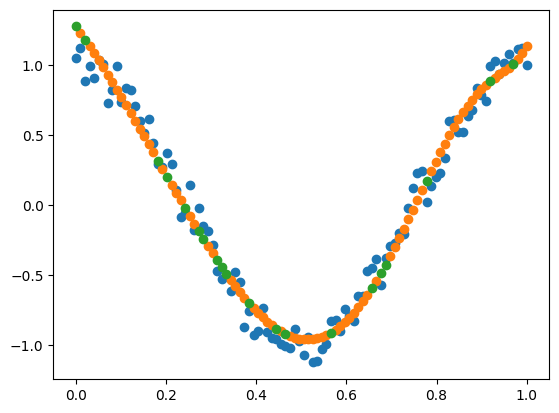

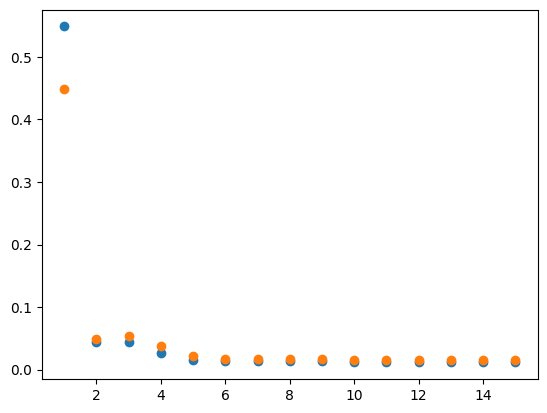

In [155]:
from sklearn.linear_model import Ridge
plt.scatter(x,z)
test_scores = []
train_scores = []
#coef[1][25] = [];
x_train,x_test,z_train,z_test = train_test_split(x,z,test_size=0.2,shuffle=True)
for itr in range(15):
    mdl = PolynomialFeatures(degree=itr+1)
    mdl.fit_transform(x_train.reshape(80,1))
    modelx = make_pipeline(mdl,Ridge(alpha=0.001))
    modelx.fit(x_train.reshape(80,1),z_train)
    mdl_out1 = modelx.predict(x_train.reshape(80,1))
    train_scores.append(mean_squared_error(z_train,mdl_out1))
    print(modelx.steps[1][1].coef_,modelx.steps[1][1].intercept_)
    mdl_out2 = modelx.predict(x_test.reshape(20,1))
    test_scores.append(mean_squared_error(z_test,mdl_out2))
plt.scatter(x_train,mdl_out1)
plt.scatter(x_test,mdl_out2)
plt.figure()
plt.scatter(np.linspace(1,len(train_scores),len(train_scores)),train_scores)
plt.scatter(np.linspace(1,len(test_scores),len(test_scores)),test_scores)